In [1]:
# importing the required library
import numpy as np
import pandas as pd
import networkx as nx
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
# import visualization method
from unicodedata import normalize
from mlfinlab.networks.visualisations import generate_mst_server
from mlfinlab.networks.visualisations import generate_pmfg_server
from mlfinlab.networks.pmfg import PMFG
from mlfinlab.networks.mst import MST
from mlfinlab.networks.dash_graph import DashGraph,PMFGDash

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021120356.html')
B = pd.read_html('Report16Jul2021120443.html')
C = pd.read_html('Report16Jul2021120536.html')
D = pd.read_html('Report16Jul2021120614.html')
E = pd.read_html('Report16Jul2021121350.html')
F = pd.read_html('Report16Jul2021121442.html')
G = pd.read_html('Report16Jul2021121540.html')
H = pd.read_html('Report16Jul2021121736.html')
I = pd.read_html('Report16Jul2021121824.html')
J = pd.read_html('Report16Jul2021121948.html')

In [3]:
#A[11]

In [4]:
# choosing the data that we will use 
A1=A[11]
B1=B[11]
C1=C[11]
D1=D[11]
E1=E[11]
F1=F[11]
G1=G[11]
H1=H[11]
I1=I[11]
J1=J[11]

In [42]:
#A1

In [43]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[1:] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header

New_header2 = B1.iloc[0]
B2 = B1[1:]
B2.columns = New_header2

New_header3 = C1.iloc[0]
C2 = C1[1:]
C2.columns = New_header3

New_header4 = D1.iloc[0]
D2 = D1[1:]
D2.columns = New_header4

New_header5 = E1.iloc[0]
E2 = E1[1:]
E2.columns = New_header5

New_header6 = F1.iloc[0]
F2 = F1[1:]
F2.columns = New_header6

New_header7 = C1.iloc[0]
G2 = G1[1:]
G2.columns = New_header7

New_header8 = H1.iloc[0]
H2 = H1[1:]
H2.columns = New_header8

New_header9 = I1.iloc[0]
I2 = I1[1:]
I2.columns = New_header9

New_header10 = J1.iloc[0]
J2 = J1[1:]
J2.columns = New_header10

In [44]:
# Now we need to rename the header of each stocks using stocks names
A11=A2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SBK','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

B11=B2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'AGL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

C11=C2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'TKG','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

D11=D2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'WHL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

E11=E2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'BAT','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

F11=F2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SOL','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

G11=G2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'APN','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

H11=H2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'BHP','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

I11=I2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SHP','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

J11=J2.rename(columns={'Date': '1','High':'2','Low':'3','Open':'4','Close':'SLM','Volume':'5',
                      'InterestYield':'6','CapitalPaymentYield':'7','TotalDistributionYield':'8',
                      'EY':'9','P/E':'10','DY':'11'})

In [45]:
# put date as the index for all data
A_1=A11.set_index('1')
B_1=B11.set_index('1')
C_1=C11.set_index('1')
D_1=D11.set_index('1')
E_1=E11.set_index('1')
F_1=F11.set_index('1')
G_1=G11.set_index('1')
H_1=H11.set_index('1')
I_1=I11.set_index('1')
J_1=J11.set_index('1')

In [46]:
# dropping all the column and remain only  column with the name of company for all the data
AX=A_1.dropna(thresh=10)['SBK']
BX=B_1.dropna(thresh=10)['AGL']
CX=C_1.dropna(thresh=10)['TKG']
DX=D_1.dropna(thresh=10)['WHL']
EX=E_1.dropna(thresh=10)['BAT']
FX=F_1.dropna(thresh=10)['SOL']
GX=G_1.dropna(thresh=10)['APN']
HX=H_1.dropna(thresh=10)['BHP']
IX=I_1.dropna(thresh=10)['SHP']
JX=J_1.dropna(thresh=10)['SLM']

In [47]:
# Now we need to concatinate our data as follows

In [48]:
st = pd.concat([AX,BX,CX,DX,EX,FX,GX,HX,IX,JX],axis=1,keys=['SBK','AGL','TKG','WHL','BAT',
                                                 'SOL','APN','BHP','SHP','SLM'])
st

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
15 Jul 2021,12431,59856,4498,5328,288,21450,17227,45332,15570,5906
14 Jul 2021,12791,60599,4490,5365,292,23252,17150,45675,15500,5900
13 Jul 2021,12523,59643,4433,5213,304,22385,17169,45370,15308,5887
12 Jul 2021,13175,59452,4577,5424,300,22511,17272,45209,15964,6030
09 Jul 2021,13321,58800,4514,5511,295,22250,16805,44602,15787,6025
...,...,...,...,...,...,...,...,...,...,...
21 Jul 2016,13739,14929,6450,8650,12262,40095,37654,17784,19258,6447
20 Jul 2016,13675,14384,6450,8579,12248,39997,38056,17380,19498,6406
19 Jul 2016,13458,15399,6412,8437,12190,40088,37446,17928,17511,6321


In [49]:
# changing the data type to numeric
st1=st.astype('float')
st1

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
1,,,,,,,,,,
15 Jul 2021,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
14 Jul 2021,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
13 Jul 2021,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
12 Jul 2021,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
09 Jul 2021,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0
...,...,...,...,...,...,...,...,...,...,...
21 Jul 2016,13739.0,14929.0,6450.0,8650.0,12262.0,40095.0,37654.0,17784.0,19258.0,6447.0
20 Jul 2016,13675.0,14384.0,6450.0,8579.0,12248.0,39997.0,38056.0,17380.0,19498.0,6406.0
19 Jul 2016,13458.0,15399.0,6412.0,8437.0,12190.0,40088.0,37446.0,17928.0,17511.0,6321.0


In [50]:
st1.index.names = ['Date']
st1.head(5)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
15 Jul 2021,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
14 Jul 2021,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
13 Jul 2021,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
12 Jul 2021,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
09 Jul 2021,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0


In [51]:
# change date index into  numeric format
st1.index=pd.to_datetime(st1.index)
st1.head(5)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2021-07-15,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
2021-07-14,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
2021-07-13,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
2021-07-12,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
2021-07-09,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0


In [52]:
# From this data we want to calculate the log return for each stocks 
# ----so as we can measure day to day performance of the stocks
st1.head(5)

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2021-07-15,12431.0,59856.0,4498.0,5328.0,288.0,21450.0,17227.0,45332.0,15570.0,5906.0
2021-07-14,12791.0,60599.0,4490.0,5365.0,292.0,23252.0,17150.0,45675.0,15500.0,5900.0
2021-07-13,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0
2021-07-12,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
2021-07-09,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0


## Data we need to use now is from 15 july 2020 to 15 july 2021

In [53]:
st.index=pd.to_datetime(st.index)
st_new=st.sort_index()['2020-07-15':'2021-07-15']
st_new

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2020-07-15,11119,41044,3169,3334,290,14150,14391,36831,10450,6253
2020-07-16,11496,40583,3355,3367,297,14526,14590,36853,10529,6334
2020-07-17,11366,40796,3481,3298,295,14971,14465,37552,10523,6315
2020-07-20,11401,41038,3384,3257,284,15000,14243,37837,10363,6234
2020-07-21,11488,40744,3100,3307,294,14959,13840,36831,10284,6355
...,...,...,...,...,...,...,...,...,...,...
2021-07-09,13321,58800,4514,5511,295,22250,16805,44602,15787,6025
2021-07-12,13175,59452,4577,5424,300,22511,17272,45209,15964,6030
2021-07-13,12523,59643,4433,5213,304,22385,17169,45370,15308,5887


In [54]:
# changing the data type to numeric
st_new1=st_new.astype('float')
st_new1

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2020-07-15,11119.0,41044.0,3169.0,3334.0,290.0,14150.0,14391.0,36831.0,10450.0,6253.0
2020-07-16,11496.0,40583.0,3355.0,3367.0,297.0,14526.0,14590.0,36853.0,10529.0,6334.0
2020-07-17,11366.0,40796.0,3481.0,3298.0,295.0,14971.0,14465.0,37552.0,10523.0,6315.0
2020-07-20,11401.0,41038.0,3384.0,3257.0,284.0,15000.0,14243.0,37837.0,10363.0,6234.0
2020-07-21,11488.0,40744.0,3100.0,3307.0,294.0,14959.0,13840.0,36831.0,10284.0,6355.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-09,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0
2021-07-12,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
2021-07-13,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0


In [55]:
# Log of percentage change
cov_matrix = st_new1.pct_change().apply(lambda x: np.log(1+x)).cov()

In [56]:
corr_matrix = st_new1.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
SBK,1.000000,0.200548,0.296150,0.561162,0.147129,0.392068,0.288832,0.150661,0.355543,0.712493
AGL,0.200548,1.000000,0.118056,0.106088,0.091222,0.431527,0.211896,0.824350,0.031518,0.231838
TKG,0.296150,0.118056,1.000000,0.308108,0.173050,0.134196,0.213950,0.027111,0.226025,0.309750
WHL,0.561162,0.106088,0.308108,1.000000,0.117379,0.199436,0.197902,0.103028,0.437184,0.566982
BAT,0.147129,0.091222,0.173050,0.117379,1.000000,0.056022,0.130258,0.016813,0.111064,0.160597
SOL,0.392068,0.431527,0.134196,0.199436,0.056022,1.000000,0.233742,0.374668,0.198611,0.331183
APN,0.288832,0.211896,0.213950,0.197902,0.130258,0.233742,1.000000,0.170492,0.195509,0.336638
BHP,0.150661,0.824350,0.027111,0.103028,0.016813,0.374668,0.170492,1.000000,0.018107,0.163234
SHP,0.355543,0.031518,0.226025,0.437184,0.111064,0.198611,0.195509,0.018107,1.000000,0.349830
SLM,0.712493,0.231838,0.309750,0.566982,0.160597,0.331183,0.336638,0.163234,0.349830,1.000000


In [20]:
# Yearly returns for individual companies
ind_er = st_new1.resample('Y').last().pct_change().mean()
ind_er

SBK   -0.021797
AGL    0.234144
TKG    0.464669
WHL    0.347496
BAT   -0.227882
SOL    0.601583
APN    0.374093
BHP    0.165167
SHP    0.112143
SLM    0.005277
dtype: float64

In [21]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = st_new1.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

SBK    0.362047
AGL    0.367739
TKG    0.522947
WHL    0.356980
BAT    0.549215
SOL    0.626688
APN    0.337498
BHP    0.282591
SHP    0.349213
SLM    0.306456
dtype: float64

In [22]:
Assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
Assets.columns = ['Returns', 'Volatility']
Assets

,Returns,Volatility
SBK,-0.021797,0.362047
AGL,0.234144,0.367739
TKG,0.464669,0.522947
WHL,0.347496,0.356980
BAT,-0.227882,0.549215
SOL,0.601583,0.626688
APN,0.374093,0.337498
BHP,0.165167,0.282591
SHP,0.112143,0.349213
SLM,0.005277,0.306456


##### Example TKG has the maximum risk attached but it also offers the negative returns (loss in the investment). 

In [23]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(st_new1.columns)
num_portfolios = 10000

In [24]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [25]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(st_new1.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [26]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,SBK weight,AGL weight,TKG weight,WHL weight,BAT weight,SOL weight,APN weight,BHP weight,SHP weight,SLM weight
0,0.258811,0.240433,0.013639,0.136891,0.156054,0.196442,0.082727,0.121967,0.007451,0.101789,0.104733,0.078306
1,0.232547,0.243906,0.000999,0.196345,0.077490,0.070312,0.069366,0.161051,0.059606,0.070809,0.089196,0.204827
2,0.205359,0.241415,0.103453,0.184752,0.190367,0.115309,0.070077,0.051130,0.017730,0.057704,0.035272,0.174205
3,0.180289,0.218912,0.103545,0.143424,0.131282,0.105442,0.064026,0.022011,0.022682,0.128095,0.201680,0.077814
4,0.211381,0.249454,0.106534,0.020667,0.116813,0.146542,0.134127,0.149080,0.074605,0.093200,0.003778,0.154653


In [27]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns       0.123098
Volatility    0.200220
SBK weight    0.111787
AGL weight    0.017968
TKG weight    0.051818
WHL weight    0.038172
BAT weight    0.121577
SOL weight    0.001003
APN weight    0.130162
BHP weight    0.245394
SHP weight    0.190650
SLM weight    0.091470
Name: 8128, dtype: float64

In [28]:
st_new1

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2020-07-15,11119.0,41044.0,3169.0,3334.0,290.0,14150.0,14391.0,36831.0,10450.0,6253.0
2020-07-16,11496.0,40583.0,3355.0,3367.0,297.0,14526.0,14590.0,36853.0,10529.0,6334.0
2020-07-17,11366.0,40796.0,3481.0,3298.0,295.0,14971.0,14465.0,37552.0,10523.0,6315.0
2020-07-20,11401.0,41038.0,3384.0,3257.0,284.0,15000.0,14243.0,37837.0,10363.0,6234.0
2020-07-21,11488.0,40744.0,3100.0,3307.0,294.0,14959.0,13840.0,36831.0,10284.0,6355.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-09,13321.0,58800.0,4514.0,5511.0,295.0,22250.0,16805.0,44602.0,15787.0,6025.0
2021-07-12,13175.0,59452.0,4577.0,5424.0,300.0,22511.0,17272.0,45209.0,15964.0,6030.0
2021-07-13,12523.0,59643.0,4433.0,5213.0,304.0,22385.0,17169.0,45370.0,15308.0,5887.0


# 4.2 NETWORK CONSTRUCTION

## Now we need to calculate the log return/ daily returns for our stock and we do it by using the following formula

$$R_{t}=np.log\left(\frac{S_t}{S_{t-1}}\right)$$

where by 

$R_t$ is the return at time $t$

$S_{t}$ is the stock price at time $t$

$S_{t-1}$ is the stock price at time $t-1$

#### Example on how to calculate it one by one 

In [57]:
np.log(11496.0/11119.0)

0.03334379205561163

In [58]:
# Now the log return is given as/ daily returns
log_return_decline=np.log(st_new1).diff().iloc[1:]
log_return_decline

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
Date,,,,,,,,,,
2020-07-16,0.033344,-0.011295,0.057036,0.009849,0.023851,0.026226,0.013733,0.000597,0.007531,0.012871
2020-07-17,-0.011373,0.005235,0.036868,-0.020706,-0.006757,0.030175,-0.008604,0.018790,-0.000570,-0.003004
2020-07-20,0.003075,0.005914,-0.028261,-0.012510,-0.038001,0.001935,-0.015466,0.007561,-0.015322,-0.012910
2020-07-21,0.007602,-0.007190,-0.087656,0.015235,0.034606,-0.002737,-0.028703,-0.026948,-0.007652,0.019224
2020-07-22,-0.005149,-0.008479,0.031749,-0.033516,-0.013699,-0.052071,0.017050,-0.014164,-0.016372,0.003926
...,...,...,...,...,...,...,...,...,...,...
2021-07-09,0.039116,0.048076,0.022176,0.017573,-0.043124,0.053685,0.009266,0.047616,-0.019943,-0.001658
2021-07-12,-0.011021,0.011027,0.013860,-0.015913,0.016807,0.011662,0.027410,0.013517,0.011149,0.000830
2021-07-13,-0.050754,0.003208,-0.031967,-0.039678,0.013245,-0.005613,-0.005981,0.003555,-0.041961,-0.024000


# SHARPE RATIO

In [59]:
log_return_decline.mean()

SBK    0.000444
AGL    0.001503
TKG    0.001395
WHL    0.001868
BAT   -0.000028
SOL    0.001657
APN    0.000717
BHP    0.000827
SHP    0.001589
SLM   -0.000227
dtype: float64

In [60]:
#-- Get annualised mean returns
mus = (1+log_return_decline.mean())**252 - 1
#-- Get covariances and variances
#- Variance along diagonal of covariance matrix
#- Multiply by 252 to annualise it
cov = log_return_decline.cov()*252

In [61]:
#- How many assests to include in each portfolio
n_assets = 5
#-- How many portfolios to generate
n_portfolios = 1000

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairs = []

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = np.random.choice(list(log_return_decline.columns), n_assets, replace=False)
    #- Choose weights randomly
    weights = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights = weights/sum(weights)

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

In [62]:
import plotly.graph_objs as go

In [63]:
#-- Plot the risk vs. return of randomly generated portfolios
#- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
risk_free_rate=0 #-- Include risk free rate here for sharpe ratio

#-- Create Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, 
                         y=mean_variance_pairs[:,0], 
                      #- Add color scale for sharpe ratio   
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=8,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
#- Add title/labels
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  #title='Sample of Random Portfolios',
                  coloraxis_colorbar=dict(title="Sharpe Ratio"))

In [64]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = st_new1.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

SBK    0.362047
AGL    0.367739
TKG    0.522947
WHL    0.356980
BAT    0.549215
SOL    0.626688
APN    0.337498
BHP    0.282591
SHP    0.349213
SLM    0.306456
dtype: float64

In [65]:
# Calculating the sharpe ratio using risk free rate =0%
sharpe=(mus-0)/ann_sd
sharpe

SBK    0.327210
AGL    1.251203
TKG    0.805070
WHL    1.681789
BAT   -0.012607
SOL    0.826393
APN    0.586221
BHP    0.819996
SHP    1.408446
SLM   -0.181802
dtype: float64

In [66]:
# now we concatinate both and we have the following results
asset1=pd.concat([mus, ann_sd,sharpe],axis=1)# Creating a table for visualising returns and volatility of assets
asset1.columns=['Returns', 'Volatility','Sharpe Ratio']
asset1

,Returns,Volatility,Sharpe Ratio
SBK,0.118465,0.362047,0.327210
AGL,0.460116,0.367739,1.251203
TKG,0.421009,0.522947,0.805070
WHL,0.600365,0.356980,1.681789
BAT,-0.006924,0.549215,-0.012607
SOL,0.517891,0.626688,0.826393
APN,0.197848,0.337498,0.586221
BHP,0.231724,0.282591,0.819996
SHP,0.491847,0.349213,1.408446
SLM,-0.055714,0.306456,-0.181802


## Now we calculate the pearson Correlation coefficient

In [67]:
#st_new1

In [68]:
# Now we create the correlation matrix
# We can run the correlation using the panda correlation function to compute pearson correlation coeff btn
# each pairs of equit as follows
cor_matrix = st_new1.corr(method='pearson')

# reset symbol as index (rather than 0-X)
cor_matrix.head().reset_index()

# del cor_matrix.index.name
cor_matrix

,SBK,AGL,TKG,WHL,BAT,SOL,APN,BHP,SHP,SLM
SBK,1.000000,0.660594,0.752265,0.663099,-0.220272,0.518760,0.488607,0.550299,0.499622,0.634877
AGL,0.660594,1.000000,0.860557,0.885985,-0.589950,0.913836,0.810233,0.857575,0.653354,0.495024
TKG,0.752265,0.860557,1.000000,0.932505,-0.582841,0.852525,0.817428,0.655154,0.669859,0.629546
WHL,0.663099,0.885985,0.932505,1.000000,-0.558242,0.882407,0.803556,0.664387,0.820189,0.447245
BAT,-0.220272,-0.589950,-0.582841,-0.558242,1.000000,-0.775593,-0.756481,-0.661302,-0.204585,-0.570757
SOL,0.518760,0.913836,0.852525,0.882407,-0.775593,1.000000,0.900900,0.819059,0.616494,0.558954
APN,0.488607,0.810233,0.817428,0.803556,-0.756481,0.900900,1.000000,0.727078,0.477270,0.650932
BHP,0.550299,0.857575,0.655154,0.664387,-0.661302,0.819059,0.727078,1.000000,0.390590,0.583452
SHP,0.499622,0.653354,0.669859,0.820189,-0.204585,0.616494,0.477270,0.390590,1.000000,0.060600
SLM,0.634877,0.495024,0.629546,0.447245,-0.570757,0.558954,0.650932,0.583452,0.060600,1.000000


## Creating the heat-map using the correlation matrix

Cluster Heatmap: Correlation between assets price returns


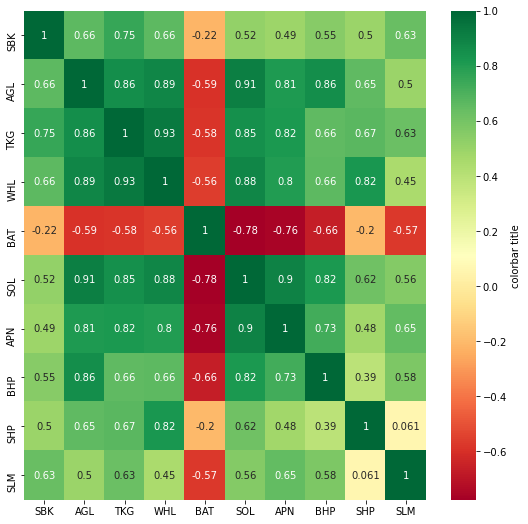

<Figure size 432x288 with 0 Axes>

In [70]:
# Importing the the required library to visualize the results 
import matplotlib.pyplot as plt 
import seaborn
import seaborn as sns
#find correlation matrix, i.e. the "distances" between each stock
plt.figure(figsize=(9, 9))
sns.heatmap(cor_matrix, annot=True, cmap='RdYlGn',cbar_kws={'label': 'colorbar title'})
print("Cluster Heatmap: Correlation between assets price returns")
plt.figure()
plt.show()

In [94]:
# From this correlation mnatrix
my_array1 = pd.DataFrame(cor_matrix)
my_array1

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.660594,0.752265,0.663099,-0.220272,0.518760,0.488607,0.550299,0.499622,0.634877
1,0.660594,1.000000,0.860557,0.885985,-0.589950,0.913836,0.810233,0.857575,0.653354,0.495024
2,0.752265,0.860557,1.000000,0.932505,-0.582841,0.852525,0.817428,0.655154,0.669859,0.629546
3,0.663099,0.885985,0.932505,1.000000,-0.558242,0.882407,0.803556,0.664387,0.820189,0.447245
4,-0.220272,-0.589950,-0.582841,-0.558242,1.000000,-0.775593,-0.756481,-0.661302,-0.204585,-0.570757
5,0.518760,0.913836,0.852525,0.882407,-0.775593,1.000000,0.900900,0.819059,0.616494,0.558954
6,0.488607,0.810233,0.817428,0.803556,-0.756481,0.900900,1.000000,0.727078,0.477270,0.650932
7,0.550299,0.857575,0.655154,0.664387,-0.661302,0.819059,0.727078,1.000000,0.390590,0.583452
8,0.499622,0.653354,0.669859,0.820189,-0.204585,0.616494,0.477270,0.390590,1.000000,0.060600
9,0.634877,0.495024,0.629546,0.447245,-0.570757,0.558954,0.650932,0.583452,0.060600,1.000000


# In order to create Minimum Spanning Tree (MST) first we need to do the following

#### (1) We need to create the distance matrix from correlation matrix

In [95]:
my_array1.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.660594,0.752265,0.663099,-0.220272,0.518760,0.488607,0.550299,0.499622,0.634877
1,0.660594,1.000000,0.860557,0.885985,-0.589950,0.913836,0.810233,0.857575,0.653354,0.495024
2,0.752265,0.860557,1.000000,0.932505,-0.582841,0.852525,0.817428,0.655154,0.669859,0.629546


In [96]:
# example on how to get the disatnce matrix values
np.sqrt((2*(1-0.660594)))

0.8239004794269754

In [97]:
# Now we create the distance matrix as follows
distance_matrix=np.sqrt(2*(1-my_array1))

# reset symbol as index (rather than 0-X)
distance_matrix.head().reset_index()

distance_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.823901,0.703897,0.820855,1.562224,0.981061,1.011329,0.948368,1.000378,0.854544
1,0.823901,0.000000,0.528096,0.477525,1.783228,0.415123,0.616063,0.533714,0.832641,1.004964
2,0.703897,0.528096,0.000000,0.367411,1.779236,0.543093,0.604271,0.830477,0.812577,0.860760
3,0.820855,0.477525,0.367411,0.000000,1.765357,0.484961,0.626807,0.819284,0.599686,1.051432
4,1.562224,1.783228,1.779236,1.765357,0.000000,1.884459,1.874290,1.822801,1.552150,1.772432
5,0.981061,0.415123,0.543093,0.484961,1.884459,0.000000,0.445197,0.601567,0.875792,0.939198
6,1.011329,0.616063,0.604271,0.626807,1.874290,0.445197,0.000000,0.738813,1.022477,0.835545
7,0.948368,0.533714,0.830477,0.819284,1.822801,0.601567,0.738813,0.000000,1.104002,0.912741
8,1.000378,0.832641,0.812577,0.599686,1.552150,0.875792,1.022477,1.104002,0.000000,1.370693
9,0.854544,1.004964,0.860760,1.051432,1.772432,0.939198,0.835545,0.912741,1.370693,0.000000


### (2) Creating an edge list from distance matrix and then apply kruskal algorithim

In [98]:
# convert distance matrix to list of edges and rename the columns
edges = distance_matrix.stack().reset_index()
edges.columns = ['Source_node','Target_node','Distance']
#distance_matrix
#remove self correlations
edges = edges.loc[edges['Source_node'] != edges['Target_node']].copy()

#show the first 5 rows of the edge list dataframe.
#edges.loc[33:67]
edges.head(10)

,Source_node,Target_node,Distance
1,0,1,0.823901
2,0,2,0.703897
3,0,3,0.820855
4,0,4,1.562224
5,0,5,0.981061
6,0,6,1.011329
7,0,7,0.948368
8,0,8,1.000378
9,0,9,0.854544
10,1,0,0.823901


In [99]:
# solting distances in ascending order
x=sorted(list(edges['Distance']))
#x

In [100]:
# getting sorted data (the first 30)
y1=edges.sort_values(by=['Distance'])
y1.head(28)

,Source_node,Target_node,Distance
23,2,3,0.367411
32,3,2,0.367411
51,5,1,0.415123
15,1,5,0.415123
65,6,5,0.445197
56,5,6,0.445197
13,1,3,0.477525
31,3,1,0.477525
53,5,3,0.484961
35,3,5,0.484961


### (3) Applying kruskal Algorithim to create Minimum Spanning Tree (MST)

# Creating Minimum spanning tree using distance matrix

In [101]:
from jupyter_dash import JupyterDash
import dash_html_components as html

In [102]:
# Now we can create MST visualization by using the following code
server=generate_mst_server(distance_matrix,jupyter=True)
server.run_server(mode="inline", host="localhost",port=12643)

# Now we can create MST visualization by using the following code
server=generate_mst_server(distance_matrix,jupyter=True)
server.run_server(mode='jupyterlab')

In [103]:
# We can choose the sector group as follow (deciding the group of stocks)
sector_group={"STANDARD BANK GROUP":["SBK"],
              "ANGLO AMERICAN PLC":["AGL"],
              "TELCOM SA SOC LTD":["TKG"],
             "WOOLWORTHS HOLDING LTD":["WHL"],
             "BRAIT PLC":["BAT"],
             "SASOL LTD":["SOL"],
             "ASPEN PHARMACARE HOLDINGS LTD":["APN"],
             "BHP GROUP PLC":["BHP"],
             "SHOPRITE HOLDING LTD":["SHP"],
             "SANLAM LTD":["SLM"]}
# we can make vertex size as follows
market_caps=[17.5,5.5,7.5,10.5,15.5,5.5,15.5,5.5,7.5,7.5]

In [105]:
# Now we can create MST visualization by using the following code (using inline)
server=generate_mst_server(distance_matrix,jupyter=True,colours=sector_group)
server.run_server(mode='inline',host="localhost",port=12643) # you can use 'inline'

In [106]:
# Now we can create MST visualization by using the following code (using external)
server=generate_mst_server(distance_matrix,jupyter=True,colours=sector_group)
server.run_server(mode='external',host="localhost",port=12643) # you can use 'inline'

Dash app running on http://localhost:12643/


## We want to calculate the degree centrality for each stock by using the formula 

$$D_c=\frac{\sum_{j=1}^{n}X_{ij}}{(n-1)(n-2)}$$

Where by;-

$n$ denote the total number of nodes $n=10$

$\sum_{j=1}^{n}X_{ij}$ denote the number of edges connecting node $x_i$

In [107]:
df = pd.DataFrame({'Ticker': ["SBK","TKG","SOL","WHL","SHP","BHP","BAT","APN","AGL","SLM"], 
                   #'Stock name': ["STANDARD BANK GROUP LTD","TELKOM SA CO LTD","SASOL LTD",
                                 # "WOOLWORTHS HOLDING LTD","SHOPRITE HOLDING LTD","BHP GROUP PLC",
                                 # "BRAIT PLC","ASPEN PHARMACARE HOLDING LTD","ANGLO AMERICAN PLC","SANLAM LTD"],
                   'No_of_nodes': [1,2,2,3,2,1,1,2,3,1]})
df

,Ticker,No_of_nodes
0,SBK,1
1,TKG,2
2,SOL,2
3,WHL,3
4,SHP,2
5,BHP,1
6,BAT,1
7,APN,2
8,AGL,3
9,SLM,1


## Using minimum spanning tree based on the degree centrality, the selection of stock is as follows

In [108]:
# new calculated degree centrality
df["Degree Centrality"] = df["No_of_nodes"]/((10-1)*(10-2))
df

,Ticker,No_of_nodes,Degree Centrality
0,SBK,1,0.013889
1,TKG,2,0.027778
2,SOL,2,0.027778
3,WHL,3,0.041667
4,SHP,2,0.027778
5,BHP,1,0.013889
6,BAT,1,0.013889
7,APN,2,0.027778
8,AGL,3,0.041667
9,SLM,1,0.013889


In [109]:
# new betweennes column
address = [0.0,0.2222222222222222,0.38888888888888884,
                                          0.6666666666666666,0.2222222222222222,0.0,
                                          0.0,0.2222222222222222,0.6388888888888888,0.0]
df['Betweeness Centrality'] = address
df

,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality
0,SBK,1,0.013889,0.000000
1,TKG,2,0.027778,0.222222
2,SOL,2,0.027778,0.388889
3,WHL,3,0.041667,0.666667
4,SHP,2,0.027778,0.222222
5,BHP,1,0.013889,0.000000
6,BAT,1,0.013889,0.000000
7,APN,2,0.027778,0.222222
8,AGL,3,0.041667,0.638889
9,SLM,1,0.013889,0.000000


In [110]:
# new calculated closeness centrality 
address3 = [0.28125,0.375,0.40909091,0.5,0.375,0.3,0.28125,0.32143,0.5,0.25]
df['Closeness Centrality'] = address3
df

,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality
0,SBK,1,0.013889,0.000000,0.281250
1,TKG,2,0.027778,0.222222,0.375000
2,SOL,2,0.027778,0.388889,0.409091
3,WHL,3,0.041667,0.666667,0.500000
4,SHP,2,0.027778,0.222222,0.375000
5,BHP,1,0.013889,0.000000,0.300000
6,BAT,1,0.013889,0.000000,0.281250
7,APN,2,0.027778,0.222222,0.321430
8,AGL,3,0.041667,0.638889,0.500000
9,SLM,1,0.013889,0.000000,0.250000


In [111]:
# calculate eigenvector centrality
address33 = [0.0241,0.19298,0.19298,0.65142,0.19298,0.0241,0.0241,0.19298,0.65142,0.0241]
df['Eigenvector Centrality'] = address33
df

,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality,Eigenvector Centrality
0,SBK,1,0.013889,0.000000,0.281250,0.02410
1,TKG,2,0.027778,0.222222,0.375000,0.19298
2,SOL,2,0.027778,0.388889,0.409091,0.19298
3,WHL,3,0.041667,0.666667,0.500000,0.65142
4,SHP,2,0.027778,0.222222,0.375000,0.19298
5,BHP,1,0.013889,0.000000,0.300000,0.02410
6,BAT,1,0.013889,0.000000,0.281250,0.02410
7,APN,2,0.027778,0.222222,0.321430,0.19298
8,AGL,3,0.041667,0.638889,0.500000,0.65142
9,SLM,1,0.013889,0.000000,0.250000,0.02410


In [112]:
# new calculated Centrality index 
df["Centrality_index"] = (0.5*df["Degree Centrality"])+(0.5*df["Betweeness Centrality"])
df

,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality,Eigenvector Centrality,Centrality_index
0,SBK,1,0.013889,0.000000,0.281250,0.02410,0.006944
1,TKG,2,0.027778,0.222222,0.375000,0.19298,0.125000
2,SOL,2,0.027778,0.388889,0.409091,0.19298,0.208333
3,WHL,3,0.041667,0.666667,0.500000,0.65142,0.354167
4,SHP,2,0.027778,0.222222,0.375000,0.19298,0.125000
5,BHP,1,0.013889,0.000000,0.300000,0.02410,0.006944
6,BAT,1,0.013889,0.000000,0.281250,0.02410,0.006944
7,APN,2,0.027778,0.222222,0.321430,0.19298,0.125000
8,AGL,3,0.041667,0.638889,0.500000,0.65142,0.340278
9,SLM,1,0.013889,0.000000,0.250000,0.02410,0.006944


In [113]:
# getting sorted data based on centrality index 
final=df.sort_values(by=['Centrality_index'],ascending=False)
final

,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality,Eigenvector Centrality,Centrality_index
3,WHL,3,0.041667,0.666667,0.500000,0.65142,0.354167
8,AGL,3,0.041667,0.638889,0.500000,0.65142,0.340278
2,SOL,2,0.027778,0.388889,0.409091,0.19298,0.208333
1,TKG,2,0.027778,0.222222,0.375000,0.19298,0.125000
4,SHP,2,0.027778,0.222222,0.375000,0.19298,0.125000
7,APN,2,0.027778,0.222222,0.321430,0.19298,0.125000
0,SBK,1,0.013889,0.000000,0.281250,0.02410,0.006944
5,BHP,1,0.013889,0.000000,0.300000,0.02410,0.006944
6,BAT,1,0.013889,0.000000,0.281250,0.02410,0.006944
9,SLM,1,0.013889,0.000000,0.250000,0.02410,0.006944


In [115]:
# Specifying the algorithim
server=generate_mst_server(distance_matrix,mst_algorithm="prim",jupyter=True,colours=sector_group)
server.run_server(mode='external',host="localhost",port=12643)

Dash app running on http://localhost:12643/


## Creating the Planar maximality filtered graph (PMFG)

#### (1) We need to use correlation matrix 

In [116]:
# Recall from correlation matrix
my_array1

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.660594,0.752265,0.663099,-0.220272,0.518760,0.488607,0.550299,0.499622,0.634877
1,0.660594,1.000000,0.860557,0.885985,-0.589950,0.913836,0.810233,0.857575,0.653354,0.495024
2,0.752265,0.860557,1.000000,0.932505,-0.582841,0.852525,0.817428,0.655154,0.669859,0.629546
3,0.663099,0.885985,0.932505,1.000000,-0.558242,0.882407,0.803556,0.664387,0.820189,0.447245
4,-0.220272,-0.589950,-0.582841,-0.558242,1.000000,-0.775593,-0.756481,-0.661302,-0.204585,-0.570757
5,0.518760,0.913836,0.852525,0.882407,-0.775593,1.000000,0.900900,0.819059,0.616494,0.558954
6,0.488607,0.810233,0.817428,0.803556,-0.756481,0.900900,1.000000,0.727078,0.477270,0.650932
7,0.550299,0.857575,0.655154,0.664387,-0.661302,0.819059,0.727078,1.000000,0.390590,0.583452
8,0.499622,0.653354,0.669859,0.820189,-0.204585,0.616494,0.477270,0.390590,1.000000,0.060600
9,0.634877,0.495024,0.629546,0.447245,-0.570757,0.558954,0.650932,0.583452,0.060600,1.000000


#### (2) creating edge list

In [117]:
# convert distance matrix to list of edges and rename the columns
edges = my_array1.stack().reset_index()
edges.columns = ['Source_node','Target_node','correlation']
#distance_matrix
#remove self correlations
edges = edges.loc[edges['Source_node'] != edges['Target_node']].copy()

#show the first 5 rows of the edge list dataframe.
#edges.loc[33:67]
edges

,Source_node,Target_node,correlation
1,0,1,0.660594
2,0,2,0.752265
3,0,3,0.663099
4,0,4,-0.220272
5,0,5,0.518760
...,...,...,...
94,9,4,-0.570757
95,9,5,0.558954
96,9,6,0.650932
97,9,7,0.583452


#### (3) Arrange Correlation in Descending order (from maximum to minimum)

In [118]:
# solting correlation in descending order so as we can apply Kruskal Algorithim
correlation=edges.sort_values(by="correlation",ascending=False)
correlation.head(28)

,Source_node,Target_node,correlation
23,2,3,0.932505
32,3,2,0.932505
51,5,1,0.913836
15,1,5,0.913836
56,5,6,0.900900
65,6,5,0.900900
31,3,1,0.885985
13,1,3,0.885985
35,3,5,0.882407
53,5,3,0.882407


In [119]:
correlation=edges.sort_values(by="correlation",ascending=False)
correlation1=correlation.drop_duplicates(subset="correlation", keep="first")
#df = df.drop_duplicates(subset='Name', keep='first')
correlation1.tail(22)

,Source_node,Target_node,correlation
92,9,2,0.629546
85,8,5,0.616494
97,9,7,0.583452
95,9,5,0.558954
70,7,0,0.550299
50,5,0,0.518760
80,8,0,0.499622
91,9,1,0.495024
60,6,0,0.488607
68,6,8,0.477270


#### (4) Creating Planar Maximally Filtered Graph using edge list above

In [120]:
# creating the Planar maximality filtered graph usind distance matrix
# creating PMFG object
pmj=PMFG(distance_matrix,"distance")

# creating PMFG  graph/extracting the graph
pmg_graph=pmj.get_graph()

In [121]:
from mlfinlab.networks.visualisations import generate_central_peripheral_ranking
# creating ranking based on the PMFG input
ranked_node=generate_central_peripheral_ranking(pmg_graph)
ranked_node=pd.DataFrame(ranked_node,columns=["Ranking","Ticker"])
ranked_node

,Ranking,Ticker
0,3.223304,7
1,4.738813,0
2,4.980838,9
3,6.174575,4
4,7.442860,8
5,8.097847,6
6,9.711138,1
7,10.880973,3
8,11.852791,5
9,15.127847,2


In [123]:
# now we do stock selection as follows
m_stock=5

lowest_rank_peripheral=np.array(ranked_node.iloc[m_stock,1]).tolist()
higher_rank_central=np.array(ranked_node.iloc[-m_stock:,1]).tolist()

print(lowest_rank_peripheral)
print()
print(higher_rank_central)

6

[6, 1, 3, 5, 2]


In [124]:
# Defining the colours to show different ranked node
colours={"lowest_rank_peripheral":lowest_rank_peripheral,"higher_rank_central":higher_rank_central}

In [128]:
# Generating PMFG visualization server
server1=generate_pmfg_server(my_array1,jupyter=True)
server1.run_server(mode='inline',host="localhost",port=12643)
#plt.savefig('REMSYA') 

/home/stamili/.local/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [129]:
stamina=[4,3,3,3,4,5,8,6,7,5]
ranked_node['No_of_nodes'] = stamina
ranked_node

,Ranking,Ticker,No_of_nodes
0,3.223304,7,4
1,4.738813,0,3
2,4.980838,9,3
3,6.174575,4,3
4,7.442860,8,4
5,8.097847,6,5
6,9.711138,1,8
7,10.880973,3,6
8,11.852791,5,7
9,15.127847,2,5


In [130]:
# Calculating degree centrality
ranked_node["Degree Centrality"] = ranked_node["No_of_nodes"]/((10-1)*(10-2))
ranked_node

,Ranking,Ticker,No_of_nodes,Degree Centrality
0,3.223304,7,4,0.055556
1,4.738813,0,3,0.041667
2,4.980838,9,3,0.041667
3,6.174575,4,3,0.041667
4,7.442860,8,4,0.055556
5,8.097847,6,5,0.069444
6,9.711138,1,8,0.111111
7,10.880973,3,6,0.083333
8,11.852791,5,7,0.097222
9,15.127847,2,5,0.069444


In [131]:
# Calculating the betweeness centrality
address01 = [0.019444,0.0,0.0,0.0,0.014815,0.04722,0.257407,0.079630,0.178704,0.041667]
ranked_node['Betweeness Centrality'] = address01
ranked_node

,Ranking,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality
0,3.223304,7,4,0.055556,0.019444
1,4.738813,0,3,0.041667,0.000000
2,4.980838,9,3,0.041667,0.000000
3,6.174575,4,3,0.041667,0.000000
4,7.442860,8,4,0.055556,0.014815
5,8.097847,6,5,0.069444,0.047220
6,9.711138,1,8,0.111111,0.257407
7,10.880973,3,6,0.083333,0.079630
8,11.852791,5,7,0.097222,0.178704
9,15.127847,2,5,0.069444,0.041667


In [132]:
# new calculated closeness centrality 
address303 = [0.6429,0.5625,0.5294,0.5294,0.6429,0.6923,0.900,0.75,0.8182,0.6923]
ranked_node['Closeness Centrality'] = address303
ranked_node

,Ranking,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality
0,3.223304,7,4,0.055556,0.019444,0.6429
1,4.738813,0,3,0.041667,0.000000,0.5625
2,4.980838,9,3,0.041667,0.000000,0.5294
3,6.174575,4,3,0.041667,0.000000,0.5294
4,7.442860,8,4,0.055556,0.014815,0.6429
5,8.097847,6,5,0.069444,0.047220,0.6923
6,9.711138,1,8,0.111111,0.257407,0.9000
7,10.880973,3,6,0.083333,0.079630,0.7500
8,11.852791,5,7,0.097222,0.178704,0.8182
9,15.127847,2,5,0.069444,0.041667,0.6923


In [133]:
# new calculated eigenvector centrality 
address303 = [0.0935,0.0395,0.0395,0.0395,0.0935,0.1827,0.7484,0.3157,0.5013,0.1827]
ranked_node['Eigenvector Centrality'] = address303
ranked_node

,Ranking,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality,Eigenvector Centrality
0,3.223304,7,4,0.055556,0.019444,0.6429,0.0935
1,4.738813,0,3,0.041667,0.000000,0.5625,0.0395
2,4.980838,9,3,0.041667,0.000000,0.5294,0.0395
3,6.174575,4,3,0.041667,0.000000,0.5294,0.0395
4,7.442860,8,4,0.055556,0.014815,0.6429,0.0935
5,8.097847,6,5,0.069444,0.047220,0.6923,0.1827
6,9.711138,1,8,0.111111,0.257407,0.9000,0.7484
7,10.880973,3,6,0.083333,0.079630,0.7500,0.3157
8,11.852791,5,7,0.097222,0.178704,0.8182,0.5013
9,15.127847,2,5,0.069444,0.041667,0.6923,0.1827


In [134]:
### add Centrality index column and choose portfolio based on this method
# new calculated Centrality index 
ranked_node["Centrality_index"] = (0.5*ranked_node["Degree Centrality"])+(0.5*ranked_node["Betweeness Centrality"])
ranked_node

,Ranking,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality,Eigenvector Centrality,Centrality_index
0,3.223304,7,4,0.055556,0.019444,0.6429,0.0935,0.037500
1,4.738813,0,3,0.041667,0.000000,0.5625,0.0395,0.020833
2,4.980838,9,3,0.041667,0.000000,0.5294,0.0395,0.020833
3,6.174575,4,3,0.041667,0.000000,0.5294,0.0395,0.020833
4,7.442860,8,4,0.055556,0.014815,0.6429,0.0935,0.035185
5,8.097847,6,5,0.069444,0.047220,0.6923,0.1827,0.058332
6,9.711138,1,8,0.111111,0.257407,0.9000,0.7484,0.184259
7,10.880973,3,6,0.083333,0.079630,0.7500,0.3157,0.081482
8,11.852791,5,7,0.097222,0.178704,0.8182,0.5013,0.137963
9,15.127847,2,5,0.069444,0.041667,0.6923,0.1827,0.055556


In [135]:
# getting sorted data based on centrality index 
final22=ranked_node.sort_values(by=['Centrality_index'],ascending=True)
final22

,Ranking,Ticker,No_of_nodes,Degree Centrality,Betweeness Centrality,Closeness Centrality,Eigenvector Centrality,Centrality_index
1,4.738813,0,3,0.041667,0.000000,0.5625,0.0395,0.020833
2,4.980838,9,3,0.041667,0.000000,0.5294,0.0395,0.020833
3,6.174575,4,3,0.041667,0.000000,0.5294,0.0395,0.020833
4,7.442860,8,4,0.055556,0.014815,0.6429,0.0935,0.035185
0,3.223304,7,4,0.055556,0.019444,0.6429,0.0935,0.037500
9,15.127847,2,5,0.069444,0.041667,0.6923,0.1827,0.055556
5,8.097847,6,5,0.069444,0.047220,0.6923,0.1827,0.058332
7,10.880973,3,6,0.083333,0.079630,0.7500,0.3157,0.081482
8,11.852791,5,7,0.097222,0.178704,0.8182,0.5013,0.137963
6,9.711138,1,8,0.111111,0.257407,0.9000,0.7484,0.184259
